In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
data = pd.read_csv('labelled.csv')
data = data.drop(columns=['Unnamed: 0'])

In [4]:
data

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,Federal-gov,Local-gov,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,25,226802,7,1,0,0,40,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,34,198693,6,1,0,0,30,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,24,369667,10,0,0,0,40,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,26,82091,9,0,0,0,39,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,20,444554,10,1,0,0,25,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14707,30,345898,9,1,0,0,46,1,0,0,...,0,0,0,0,0,0,0,0,0,1
14708,65,99359,15,1,1086,0,60,1,0,0,...,0,0,0,0,1,0,0,0,0,1
14709,32,116138,14,1,0,0,11,1,0,0,...,0,0,0,0,0,0,0,1,0,1
14710,22,310152,10,1,0,0,40,1,0,0,...,0,0,0,0,0,1,0,0,0,1


orginal version

unlabelled = pd.read_csv('unlabelled.csv')
unlabelled = unlabelled.drop(columns=['Unnamed: 0'])

unlabel_test = pd.read_csv('unlabelled_test.csv')
unlabel_test = unlabel_test.drop(columns=['Unnamed: 0'])

X_unlabelled = unlabel_test.drop(columns=['income'])
y_unlabelled = unlabel_test['income']

In [5]:
unlabelled = pd.read_csv('new_unlabelled.csv')
unlabelled = unlabelled.drop(columns=['Unnamed: 0'])
unlabelled = unlabelled.drop(columns=['income'])

unlabel_test = pd.read_csv('test_new.csv')
unlabel_test = unlabel_test.drop(columns=['Unnamed: 0'])

X_unlabelled = unlabel_test.drop(columns=['income'])
y_unlabelled = unlabel_test['income']

In [6]:
def join_new_data(x, y):
    if len(x) != len(y):
        raise ValueError("Array length doesn't match dataframe length")

    new_y = y.copy()  # Create a copy of the DataFrame y

    new_y['income'] = x  # Modify the copied DataFrame

    return new_y  


def add_random(y):
    random_array = np.random.randint(2, size=len(y))
    x = join_new_data(random_array,y)
    return x


def proportion(arr):
    total_elements = len(arr)
    ones_count = np.count_nonzero(arr)
    
    percentage = (ones_count / total_elements) * 100
    return percentage


    

In [7]:
unlabelled

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,Federal-gov,Local-gov,Private,...,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,cluster
0,23,134446,9,1,0,0,54,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,52,201062,7,0,0,0,18,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,46,170338,9,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,21,388946,10,0,0,0,40,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,24,83141,10,1,0,1876,40,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22384,43,84661,11,1,0,0,45,0,0,1,...,0,0,0,0,0,0,1,0,0,2
22385,53,321865,14,1,0,0,40,0,0,1,...,0,0,0,0,0,0,0,0,0,2
22386,27,257302,12,0,0,0,38,0,0,1,...,0,0,0,0,0,0,0,1,0,2
22387,40,154374,9,1,0,0,40,0,0,1,...,0,1,0,0,0,0,0,0,0,2


In [8]:
def train_dt_loop(label,unlabel, test, n):
    array = np.array([])
    # for our first go we will add some random labels to the unlabelled data
    random_entries = add_random(unlabel)
    # and join it with the labelled
    data = pd.concat([label, random_entries], axis=0)
    
    i = 0
    while i < n:
        #shuffle
        data = data.sample(frac = 1)

        X = data.drop(columns=['income'])
        y = data['income']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the numerical features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test_scaled)

        # Calculate accuracy on the test set
        accuracy = accuracy_score(y_test, y_pred)

        array = np.append(array,[accuracy])
        
        y_s = model.predict(unlabel)
        
        
        undata = join_new_data(y_s, unlabel)
        data = pd.concat([label, undata], axis=0)
        
        i = i+1
        
        prop = proportion(y_s)
    return model, array, prop

    
    

    

In [9]:
model, accuracy, pro = train_dt_loop(data,unlabelled, unlabel_test,30)

In [10]:
pro

2.6977533610255033

In [11]:
def train_rf_loop(label,unlabel, test, n):
    array = np.array([])
    # for our first go we will add some random labels to the unlabelled data
    random_entries = add_random(unlabel)
    # and join it with the labelled
    data = pd.concat([label, random_entries], axis=0)
    
    i = 0
    while i < n:
        #shuffle
        data = data.sample(frac = 1)

        X = data.drop(columns=['income'])
        y = data['income']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the numerical features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Build the Random Forest classifier
        model = RandomForestClassifier(n_estimators=100, random_state=42)

        
        model.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test_scaled)

        # Calculate accuracy on the test set
        accuracy = accuracy_score(y_test, y_pred)

        array = np.append(array,[accuracy])
        
        y_s = model.predict(unlabel)
        
        
        undata = join_new_data(y_s, unlabel)
        data = pd.concat([label, undata], axis=0)
        
        i = i+1
        
        prop = proportion(y_s)
    return model, array, prop


    

model, accuracy = train_rf_loop(data,unlabelled, unlabel_test,30)

In [12]:
def train_lr_loop(label,unlabel, test, n):
    array = np.array([])
    # for our first go we will add some random labels to the unlabelled data
    random_entries = add_random(unlabel)
    # and join it with the labelled
    data = pd.concat([label, random_entries], axis=0)
    
    i = 0
    while i < n:
        #shuffle
        data = data.sample(frac = 1)

        X = data.drop(columns=['income'])
        y = data['income']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Standardize the numerical features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Build the Logistic Regression model
        model = LogisticRegression(random_state=42)
        
        model.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test_scaled)

        # Calculate accuracy on the test set
        accuracy = accuracy_score(y_test, y_pred)

        array = np.append(array,[accuracy])
        
        y_s = model.predict(unlabel)
        
        
        undata = join_new_data(y_s, unlabel)
        data = pd.concat([label, undata], axis=0)
        
        i = i+1
        
        prop = proportion(y_s)
    return model, array, prop


In [13]:
model, accuracy, prop = train_lr_loop(data,unlabelled, unlabel_test,30)

Ensemble Accuracy: 0.97
Unlabelled Data Test Accuracy: 0.9178672577268809
Confusion Matrix (Unlabelled Data):
[[ 191  644]
 [  23 7263]]
Classification Report (Unlabelled Data):
              precision    recall  f1-score   support

       <=50K       0.89      0.23      0.36       835
        >50K       0.92      1.00      0.96      7286

    accuracy                           0.92      8121
   macro avg       0.91      0.61      0.66      8121
weighted avg       0.92      0.92      0.90      8121



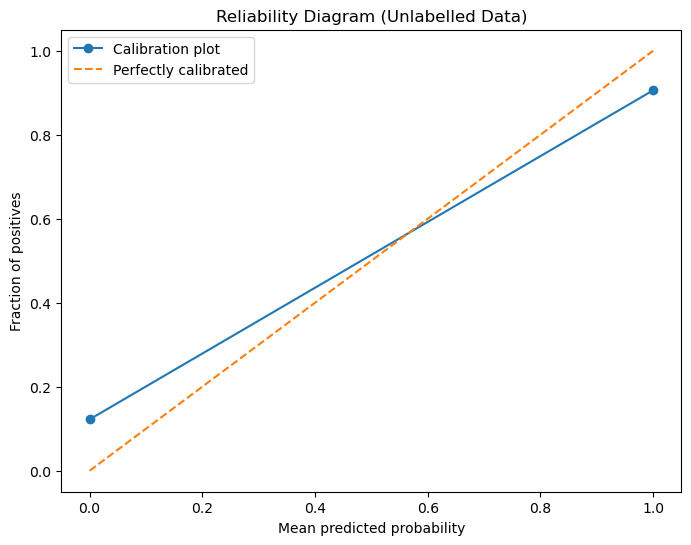

Ensemble Accuracy: 0.97
Elapsed Time: 66.15 seconds
[98.38760105408906, 98.20447541203269, 97.80695877439814, 98.07941399794542, 98.49479655187815, 97.40944213676359, 97.94095314663451, 0.0, 0.0, 98.10174639331815, 98.32507034704543, 98.76725177542544, 98.80745008709634, 97.99008441645451, 0.0, 98.02134976997633, 0.0, 98.66452275671088, 98.7538523382018, 0.0, 98.68238867300907, 98.58412613336907, 98.81638304524543, 98.22680780740542, 88.42288623877798, 98.76278529635088, 0.0, 98.0972799142436, 98.8521148778418, 98.56179373799634, 0.0, 0.0, 0.0, 98.64219036133815, 0.0, 97.8516235651436, 98.10621287239269, 0.0, 97.88288891866542, 98.81638304524543, 0.0, 98.92357854303452, 98.8119165661709, 98.85658135691634, 0.0, 0.0, 98.51266246817633, 94.01045156103443, 98.70918754745634, 98.64219036133815]


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
import time

start_time = time.time()

X = data.drop(columns=['income'])
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Number of models in the ensemble
num_models = 50  # You can change this to the desired number of models

# Train the specified number of logistic regression models
#models = [train_lr_loop(data,unlabelled, unlabel_test,30)[0] for _ in range(num_models)]


store = [train_lr_loop(data, unlabelled, unlabel_test, 10) for _ in range(num_models)]
models = [model[0] for model in store]
props = [model[2] for model in store]


# Create a voting ensemble
voting_ensemble = VotingClassifier(estimators=[
    (f'model{i}', model) for i, model in enumerate(models)
], voting='hard')  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities

# Train the voting ensemble on the training data
voting_ensemble.fit(X_train, y_train)

# Make predictions using the ensemble
ensemble_predictions = voting_ensemble.predict(X_test)

# Calculate accuracy of the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {accuracy:.2f}")




y_pred_unlabelled = voting_ensemble.predict(X_unlabelled)

# Calculate accuracy on the unlabelled test data
accuracy_unlabelled = accuracy_score(y_unlabelled, y_pred_unlabelled)
print("Unlabelled Data Test Accuracy:", accuracy_unlabelled)

cm_unlabelled = confusion_matrix(y_unlabelled, y_pred_unlabelled)
print("Confusion Matrix (Unlabelled Data):")
print(cm_unlabelled)

# Calculate other scores (precision, recall, F1 score, support) for unlabelled data
report_unlabelled = classification_report(y_unlabelled, y_pred_unlabelled, target_names=['<=50K', '>50K'])
print("Classification Report (Unlabelled Data):")
print(report_unlabelled)

# Calculate reliability diagram for unlabelled data calibration
prob_pos_unlabelled = model.predict_proba(X_unlabelled)[:, 1]
prob_true_unlabelled, prob_pred_unlabelled = calibration_curve(y_unlabelled, prob_pos_unlabelled, n_bins=10)

# Plot the reliability diagram for unlabelled data
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_unlabelled, prob_true_unlabelled, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Unlabelled Data)')
plt.legend()
plt.show()



# End measuring time
end_time = time.time()

# Calculate and print the elapsed time
elapsed_time = end_time - start_time
print(f"Ensemble Accuracy: {accuracy:.2f}")
print(f"Elapsed Time: {elapsed_time:.2f} seconds")
print(props)

In [19]:
np.mean([98.61539148689089, 97.96328554200724, 98.11961230961633, 98.64219036133815, 98.66452275671088, 98.4501317611327, 98.1553441422127, 0.0, 0.0, 98.66452275671088, 97.85609004421815, 98.18660949573452, 97.96775202108178, 98.64219036133815, 98.69132163115816, 92.1836616195453, 98.1955424538836, 0.0, 0.0, 98.71812050560543, 98.28933851444907, 98.8119165661709, 98.86998079413998, 98.49479655187815, 98.23574076555451, 98.01688329090177, 97.65956496493814, 0.0, 97.69976327660905, 98.4010004913127, 98.29380499352361, 98.86551431506544, 98.65558979856179, 98.28487203537452, 98.6466568404127, 98.47693063557998, 98.2446737237036, 97.70422975568358, 98.7538523382018, 98.52159542632542, 98.61985796596542, 98.29380499352361, 98.8119165661709, 97.96775202108178, 98.91911206395999, 98.76278529635088, 98.7538523382018, 98.79851712894725, 98.76278529635088, 98.88784671043817])

88.46442449417124

Ensemble Accuracy: 0.97
Unlabelled Data Test Accuracy: 0.9258711981283093
Confusion Matrix (Unlabelled Data):
[[ 279  556]
 [  46 7240]]
Classification Report (Unlabelled Data):
              precision    recall  f1-score   support

       <=50K       0.86      0.33      0.48       835
        >50K       0.93      0.99      0.96      7286

    accuracy                           0.93      8121
   macro avg       0.89      0.66      0.72      8121
weighted avg       0.92      0.93      0.91      8121



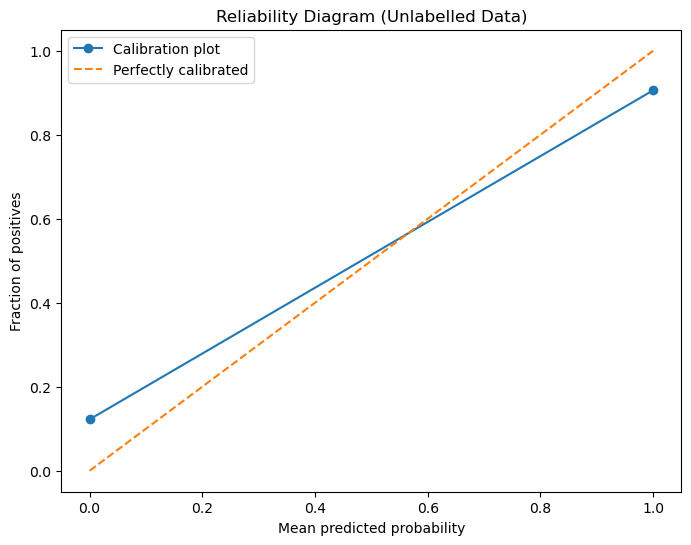

[0.0, 6.181607039171022, 0.0, 93.81839296082897, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 6.181607039171022, 0.0, 6.181607039171022, 100.0, 6.181607039171022, 100.0, 93.81839296082897, 100.0, 0.0, 0.0, 100.0, 100.0, 100.0, 6.181607039171022, 100.0, 100.0, 0.0, 0.0, 93.81839296082897, 0.0, 0.0, 93.81839296082897, 6.181607039171022, 100.0, 6.181607039171022, 6.181607039171022, 0.0, 93.81839296082897, 0.0, 100.0, 100.0, 100.0, 100.0, 0.0, 93.81839296082897, 0.0, 100.0, 0.0, 100.0, 100.0]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


# Number of models in the ensemble
num_models = 50  # You can change this to the desired number of models

# Train the specified number of logistic regression models
#models = [train_rf_loop(data,unlabelled, unlabel_test,30)[0] for _ in range(num_models)]


store = [train_rf_loop(data, unlabelled, unlabel_test, 50) for _ in range(num_models)]
models = [model[0] for model in store]
props = [model[2] for model in store]





# Create a voting ensemble
voting_ensemble = VotingClassifier(estimators=[
    (f'model{i}', model) for i, model in enumerate(models)
], voting='hard')  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities

# Train the voting ensemble on the training data
voting_ensemble.fit(X_train, y_train)

# Make predictions using the ensemble
ensemble_predictions = voting_ensemble.predict(X_test)

# Calculate accuracy of the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {accuracy:.2f}")




y_pred_unlabelled = voting_ensemble.predict(X_unlabelled)

# Calculate accuracy on the unlabelled test data
accuracy_unlabelled = accuracy_score(y_unlabelled, y_pred_unlabelled)
print("Unlabelled Data Test Accuracy:", accuracy_unlabelled)

cm_unlabelled = confusion_matrix(y_unlabelled, y_pred_unlabelled)
print("Confusion Matrix (Unlabelled Data):")
print(cm_unlabelled)

# Calculate other scores (precision, recall, F1 score, support) for unlabelled data
report_unlabelled = classification_report(y_unlabelled, y_pred_unlabelled, target_names=['<=50K', '>50K'])
print("Classification Report (Unlabelled Data):")
print(report_unlabelled)

# Calculate reliability diagram for unlabelled data calibration
prob_pos_unlabelled = model.predict_proba(X_unlabelled)[:, 1]
prob_true_unlabelled, prob_pred_unlabelled = calibration_curve(y_unlabelled, prob_pos_unlabelled, n_bins=10)

# Plot the reliability diagram for unlabelled data
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_unlabelled, prob_true_unlabelled, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Unlabelled Data)')
plt.legend()
plt.show()

print(props)

In [20]:
np.mean([0.0, 6.181607039171022, 0.0, 93.81839296082897, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 6.181607039171022, 0.0, 6.181607039171022, 100.0, 6.181607039171022, 100.0, 93.81839296082897, 100.0, 0.0, 0.0, 100.0, 100.0, 100.0, 6.181607039171022, 100.0, 100.0, 0.0, 0.0, 93.81839296082897, 0.0, 0.0, 93.81839296082897, 6.181607039171022, 100.0, 6.181607039171022, 6.181607039171022, 0.0, 93.81839296082897, 0.0, 100.0, 100.0, 100.0, 100.0, 0.0, 93.81839296082897, 0.0, 100.0, 0.0, 100.0, 100.0])

46.24726428156684

Ensemble Accuracy: 0.94
Unlabelled Data Test Accuracy: 0.8559290727742889
Confusion Matrix (Unlabelled Data):
[[ 369  466]
 [ 704 6582]]
Classification Report (Unlabelled Data):
              precision    recall  f1-score   support

       <=50K       0.34      0.44      0.39       835
        >50K       0.93      0.90      0.92      7286

    accuracy                           0.86      8121
   macro avg       0.64      0.67      0.65      8121
weighted avg       0.87      0.86      0.86      8121



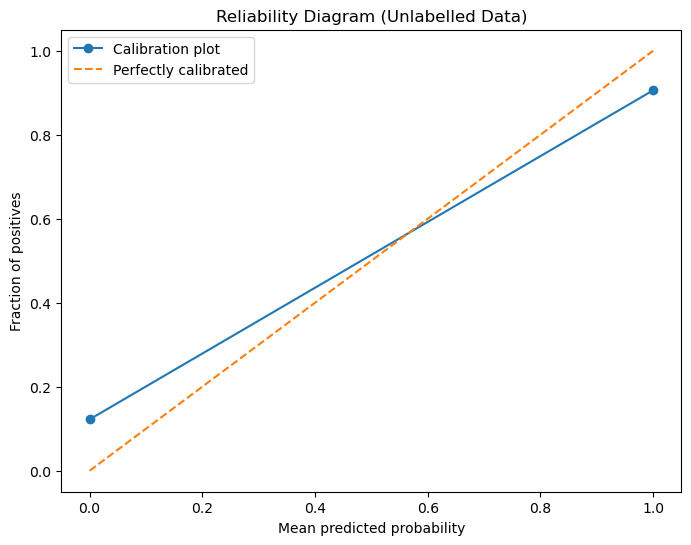

[91.4466925722453, 91.2814328464871, 3.5151190316673366, 8.75429898610925, 91.24570101389075, 6.181607039171022, 91.24570101389075, 91.24570101389075, 0.0, 0.0, 0.0, 93.60846844432534, 91.4466925722453, 6.181607039171022, 93.61740140247443, 0.0, 8.718567153512886, 93.81392648175442, 91.37969538612711, 0.04913126982000089, 0.0, 93.61740140247443, 91.24570101389075, 93.9389878958417, 93.61740140247443, 91.28589932556166, 91.4466925722453, 91.24570101389075, 0.0, 91.44222609317076, 93.94345437491626, 91.24570101389075, 93.61740140247443, 91.24570101389075, 0.0, 6.145875206574657, 0.0, 2.6977533610255033, 0.0, 0.0, 91.24570101389075, 0.0, 91.24570101389075, 0.0, 0.0, 93.61740140247443, 2.6977533610255033, 93.65759971414533, 0.0, 0.0]


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


# Number of models in the ensemble
num_models = 50  # You can change this to the desired number of models

# Train the specified number of logistic regression models
#models = [train_dt_loop(data,unlabelled, unlabel_test,30)[0] for _ in range(num_models)]

store = [train_dt_loop(data, unlabelled, unlabel_test, 50) for _ in range(num_models)]
models = [model[0] for model in store]
props = [model[2] for model in store]



# Create a voting ensemble
voting_ensemble = VotingClassifier(estimators=[
    (f'model{i}', model) for i, model in enumerate(models)
], voting='hard')  # 'hard' for majority voting, 'soft' for weighted voting based on probabilities

# Train the voting ensemble on the training data
voting_ensemble.fit(X_train, y_train)

# Make predictions using the ensemble
ensemble_predictions = voting_ensemble.predict(X_test)

# Calculate accuracy of the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_predictions)
print(f"Ensemble Accuracy: {accuracy:.2f}")





y_pred_unlabelled = voting_ensemble.predict(X_unlabelled)

# Calculate accuracy on the unlabelled test data
accuracy_unlabelled = accuracy_score(y_unlabelled, y_pred_unlabelled)
print("Unlabelled Data Test Accuracy:", accuracy_unlabelled)

cm_unlabelled = confusion_matrix(y_unlabelled, y_pred_unlabelled)
print("Confusion Matrix (Unlabelled Data):")
print(cm_unlabelled)

# Calculate other scores (precision, recall, F1 score, support) for unlabelled data
report_unlabelled = classification_report(y_unlabelled, y_pred_unlabelled, target_names=['<=50K', '>50K'])
print("Classification Report (Unlabelled Data):")
print(report_unlabelled)

# Calculate reliability diagram for unlabelled data calibration
prob_pos_unlabelled = model.predict_proba(X_unlabelled)[:, 1]
prob_true_unlabelled, prob_pred_unlabelled = calibration_curve(y_unlabelled, prob_pos_unlabelled, n_bins=10)

# Plot the reliability diagram for unlabelled data
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_unlabelled, prob_true_unlabelled, marker='o', label='Calibration plot')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Reliability Diagram (Unlabelled Data)')
plt.legend()
plt.show()


print(props)

In [17]:
np.average([91.4466925722453, 91.2814328464871, 3.5151190316673366, 8.75429898610925, 91.24570101389075, 6.181607039171022, 91.24570101389075, 91.24570101389075, 0.0, 0.0, 0.0, 93.60846844432534, 91.4466925722453, 6.181607039171022, 93.61740140247443, 0.0, 8.718567153512886, 93.81392648175442, 91.37969538612711, 0.04913126982000089, 0.0, 93.61740140247443, 91.24570101389075, 93.9389878958417, 93.61740140247443, 91.28589932556166, 91.4466925722453, 91.24570101389075, 0.0, 91.44222609317076, 93.94345437491626, 91.24570101389075, 93.61740140247443, 91.24570101389075, 0.0, 6.145875206574657, 0.0, 2.6977533610255033, 0.0, 0.0, 91.24570101389075, 0.0, 91.24570101389075, 0.0, 0.0, 93.61740140247443, 2.6977533610255033, 93.65759971414533, 0.0, 0.0])

48.858635937290636